# Extraction of Basic Features from PPG Signal acquired from Empatica

## Import packages

In [41]:
from utils.process_ppg import get_clean_segment, get_ppg_measures_batch
from scipy import signal
from datetime import datetime
%matplotlib inline

import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp
import pandas as pd
pd.set_option("display.precision", 2)
from scipy.interpolate import interp1d


# Load the data 
### Specify directory paths and the file containing PPG signal

In [42]:
basepath = os.path.join('data', 'PulseSensor_Data') 
# Change this to analyze PPG singal of your interest
filepath = os.path.join(basepath, r'TCC - Experiencing Material_Baseline_raw_signal_1660783201.npy')
sample_rate = 100  #Change this as per the sampling rate.
raw_signal = np.load(filepath)
dataframe = pd.DataFrame(raw_signal, columns = ['ppg1'])

In [43]:
time_array = np.arange(0, len(raw_signal)/sample_rate, 1/sample_rate)

## Visualize raw signal

<AxesSubplot:>

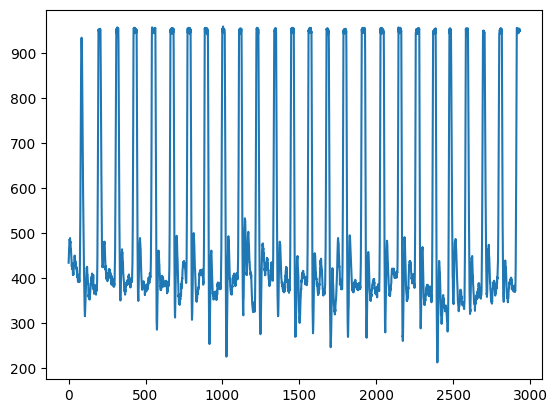

In [44]:
dataframe['ppg1'].plot()

## Filter the signal and Plot


In [45]:
sos = signal.butter(10, (0.5, 5.0), 'bandpass', fs=sample_rate, output='sos')
filtered = signal.sosfilt(sos, raw_signal)

Text(0.5, 1.0, 'Filtered PPG Signal')

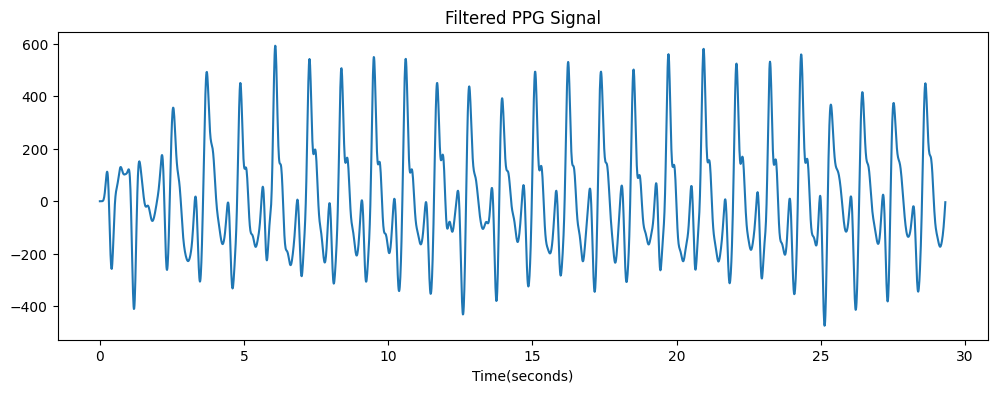

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(time_array, filtered)
plt.xlabel('Time(seconds)')
plt.title('Filtered PPG Signal')

Text(0.5, 1.0, 'Clean Segment of Filtered PPG Signal')

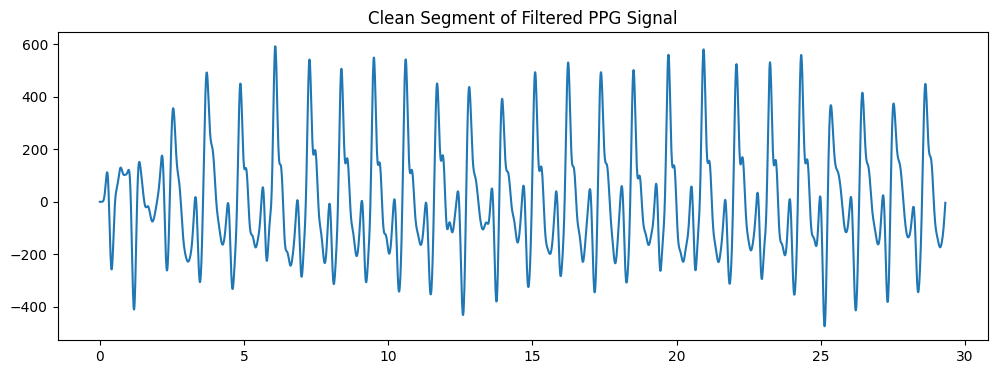

In [47]:
# This will try to get maximum clean segment available from the entire signal. With higher number for std_n, larger segment can be expected - though having more noise
filtered_clean = get_clean_segment(filtered, std_n=3.0)
plt.figure(figsize=(12, 4))
filt_time_array = np.arange(0, len(filtered_clean)/sample_rate, 1/sample_rate)
plt.plot(filt_time_array, filtered_clean)
plt.title('Clean Segment of Filtered PPG Signal')


## Compute the features using 'heartpy' Python package <br>
Plot the signal with peaks identified and print the measures derived

In [48]:
wd, m = hp.process(filtered_clean, sample_rate=sample_rate)
print(wd.keys())

#display computed features
for measure in m.keys():
    print(measure, m[measure])

dict_keys(['hr', 'sample_rate', 'peaklist', 'ybeat', 'rolling_mean', 'RR_list', 'RR_indices', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor', 'nn20', 'nn50', 'poincare', 'breathing_signal', 'breathing_psd', 'breathing_frq'])
bpm 52.82465150403522
ibi 1135.8333333333333
sdnn 45.177120561432666
sdsd 27.961626418806134
rmssd 40.378642654362416
pnn20 0.34782608695652173
pnn50 0.21739130434782608
hr_mad 30.0
sd1 28.470792249991128
sd2 57.77212258042812
s 5167.348458912394
sd1/sd2 0.4928119476717372
breathingrate 0.1467351430667645


### Plot PPG signal with detected and rejected peaks

Text(0.5, 1.0, 'Filtered PPG Signal with Detected Peaks: ')

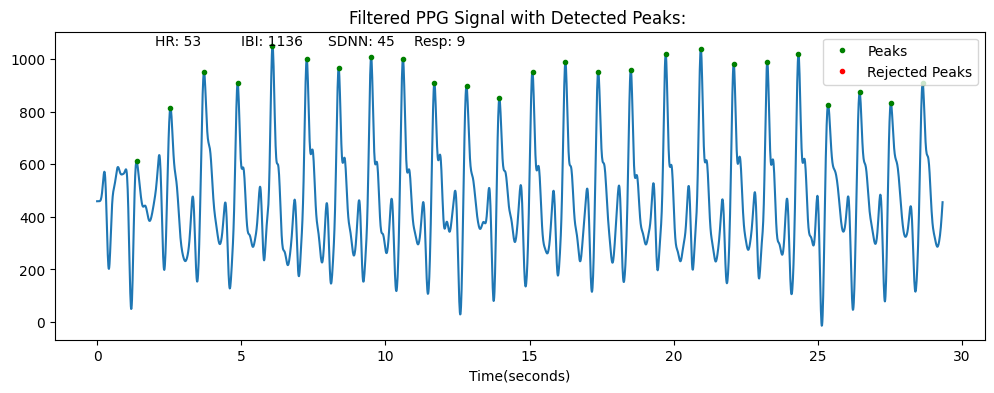

In [49]:
#Plot PPG Signal with Peaks
plt.figure(figsize=(12,4))
x_axis = [i/sample_rate for i in range(len(wd['hr']))]
plt.plot(x_axis, wd['hr'])
plt.plot(np.array(wd['peaklist'])/sample_rate, wd['hr'][wd['peaklist']], '.', color='g', label='Peaks')
plt.plot(np.array(wd['removed_beats'])/sample_rate, wd['hr'][wd['removed_beats']], '.', color='r', label='Rejected Peaks')
mx = max(wd['hr'])
plt.text(2,  mx, 'HR: ' + str(int(round(m['bpm']))))
plt.text(5, mx, 'IBI: ' +  str(int(round(m['ibi']))))
plt.text(8, mx, 'SDNN: ' +  str(int(round(m['sdnn']))))
plt.text(11, mx, 'Resp: ' +  str(int(round(m['breathingrate'] * 60))))

plt.legend()
plt.xlabel('Time(seconds)')
plt.title('Filtered PPG Signal with Detected Peaks: ')

### Plot Breathing signal derived from PPG signal

Text(0.5, 1.0, 'Breathing Signal')

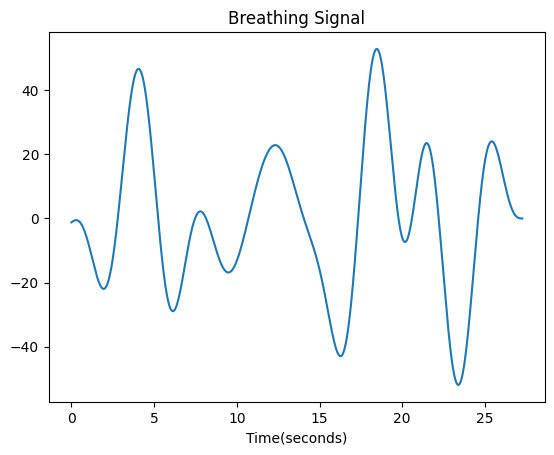

In [50]:
# Plot breathing signal derived from PPG signal
x_axis_br = [i/1000.0 for i in range(len(wd['breathing_signal']))]
plt.plot(x_axis_br, wd['breathing_signal'])
plt.xlabel('Time(seconds)')
plt.title('Breathing Signal')